In [1]:
using Falcons
using Condor
using Healpix
using Plots

┌ Info: Precompiling Condor [ce3e846d-a250-429b-81e6-e6cf6b410658]
└ @ Base loading.jl:1423
┌ Warning: Package Condor does not have Falcons in its dependencies:
│ - If you have Condor checked out for development and have
│   added Falcons as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Condor
└ Loading Falcons into Condor from project dependency, future warnings for Condor are suppressed.


In [2]:
ss = gen_ScanningStrategy()

ss.nside = 128
ss.sampling_rate = 1#[Hz]
ss.alpha = 45 #[degree]
ss.beta = 50 #[degree]
ss.prec_rpm = period2rpm(192.348)
ss.spin_rpm = 0.05 #[rpm]
ss.hwp_rpm = 46.0 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"
ss.coord="G"  # 
ss.FP_theta = [0] #[target_det.theta[1]]
ss.FP_phi = [0] #[target_det.phi[1]] .+ 30

1-element Vector{Int64}:
 0

In [18]:
theta_tod, phi_tod, psi_tod, alpha_tod, pix_tod = get_pointings_theta_phi_psi_alpha_pix_tod(ss, 0, 100);

In [28]:
cp = gen_ConvolutionParams()
cp.npix = nside2npix(ss.nside) # Int npix
cp.lmax = 3*ss.nside-1 # Int lmax
cp.alm = rand(ComplexF64, 3, numberOfAlms(cp.lmax,cp.lmax)) # Random alm
cp.blm = rand(ComplexF64, 3, numberOfAlms(cp.lmax,cp.lmax)) # Random blm
cp.l_range = [0,100] # Int ell's calculate range

2-element Vector{Int64}:
   0
 100

In [29]:
tod = @time tod_convolution_idalhwp(cp, theta_tod[:,1], phi_tod[:,1], psi_tod[:,1],alpha_tod[:,1]);

  1.210898 seconds (276.51 k allocations: 717.211 MiB, 7.43% gc time)


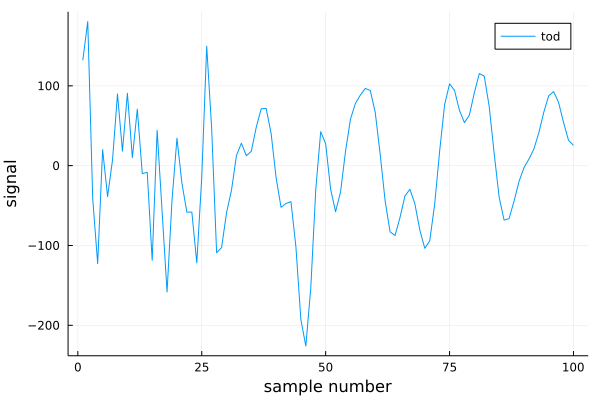

In [30]:
plot(tod[:], label = "tod", xlabel="sample number", ylabel="signal")